# 2. Modeling DeepLearning LSTM and GRU

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-05-31 00:23:49.969923: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("../dataset/cleaned_dataset_deeplearning_lstm_gru_model.csv")
df.head()

,Unnamed: 0,sentimen,tweet,cleaned_tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata indonesia tidak dihargai bangsa asing ber...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian games berdampak pd...
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...


In [3]:
# Tokenisasi
max_words = 5000
max_len = 50

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_tweet'])
sequences = tokenizer.texts_to_sequences(df['cleaned_tweet'])
X = pad_sequences(sequences, maxlen=max_len)

In [4]:
X

array([[   0,    0,    0, ..., 3010,   31,   73],
       [   0,    0,    0, ..., 3013, 2018, 3014],
       [   0,    0,    0, ..., 1285,  115, 3015],
       ...,
       [   0,    0,    0, ...,    5,  494,   45],
       [   0,    0,    0, ...,    8,    5,  769],
       [   0,    0,    0, ...,    3, 1797, 3005]], dtype=int32)

In [5]:
# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentimen'])

In [6]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [7]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## 2.1 LSTM

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

# Train LSTM
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3990 - loss: 1.0813 - val_accuracy: 0.4766 - val_loss: 1.0281
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5749 - loss: 0.9701 - val_accuracy: 0.5289 - val_loss: 0.9632
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7733 - loss: 0.6172 - val_accuracy: 0.5675 - val_loss: 0.9882
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8777 - loss: 0.3595 - val_accuracy: 0.5702 - val_loss: 1.0753
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9426 - loss: 0.1981 - val_accuracy: 0.5620 - val_loss: 1.3468


## 2.2 GRU

In [9]:
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GRU(64, return_sequences=False),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

# Train GRU
history_gru = model_gru.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.3425 - loss: 1.0958 - val_accuracy: 0.4545 - val_loss: 1.0725
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6061 - loss: 0.9885 - val_accuracy: 0.5152 - val_loss: 0.9977
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7549 - loss: 0.6574 - val_accuracy: 0.5234 - val_loss: 1.0965
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8702 - loss: 0.3416 - val_accuracy: 0.5455 - val_loss: 1.3324
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9573 - loss: 0.1661 - val_accuracy: 0.5262 - val_loss: 1.5147


## 2.3 Evaluasi & Confusion Matrix

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi LSTM
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm_labels = np.argmax(y_pred_lstm, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [11]:
# Prediksi GRU
y_pred_gru = model_gru.predict(X_test)
y_pred_gru_labels = np.argmax(y_pred_gru, axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [12]:
# Report LSTM
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm_labels, target_names=label_encoder.classes_))

LSTM Classification Report:
              precision    recall  f1-score   support

     negatif       0.59      0.60      0.59       119
      netral       0.56      0.62      0.59       121
     positif       0.54      0.47      0.50       123

    accuracy                           0.56       363
   macro avg       0.56      0.56      0.56       363
weighted avg       0.56      0.56      0.56       363



In [13]:
# Report GRU
print("GRU Classification Report:")
print(classification_report(y_test, y_pred_gru_labels, target_names=label_encoder.classes_))

GRU Classification Report:
              precision    recall  f1-score   support

     negatif       0.56      0.55      0.55       119
      netral       0.56      0.59      0.57       121
     positif       0.46      0.45      0.45       123

    accuracy                           0.53       363
   macro avg       0.53      0.53      0.53       363
weighted avg       0.53      0.53      0.53       363



Text(120.72222222222221, 0.5, 'Actual')

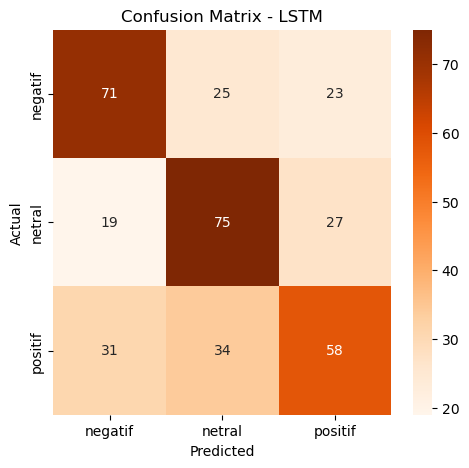

In [14]:
# Confusion Matrix GRU
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lstm_labels), annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

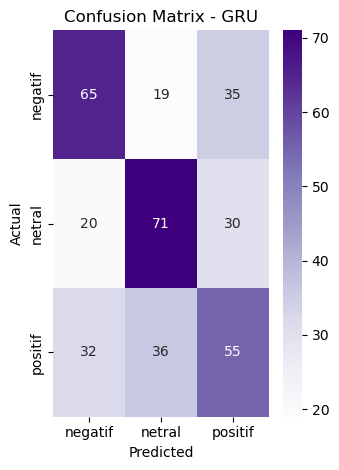

In [15]:
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_gru_labels), annot=True, fmt='d', cmap='Purples', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - GRU")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [16]:
lr_conf_matrix = confusion_matrix(y_test, y_pred_lstm_labels)
gr_conf_matrix = confusion_matrix(y_test, y_pred_gru_labels)

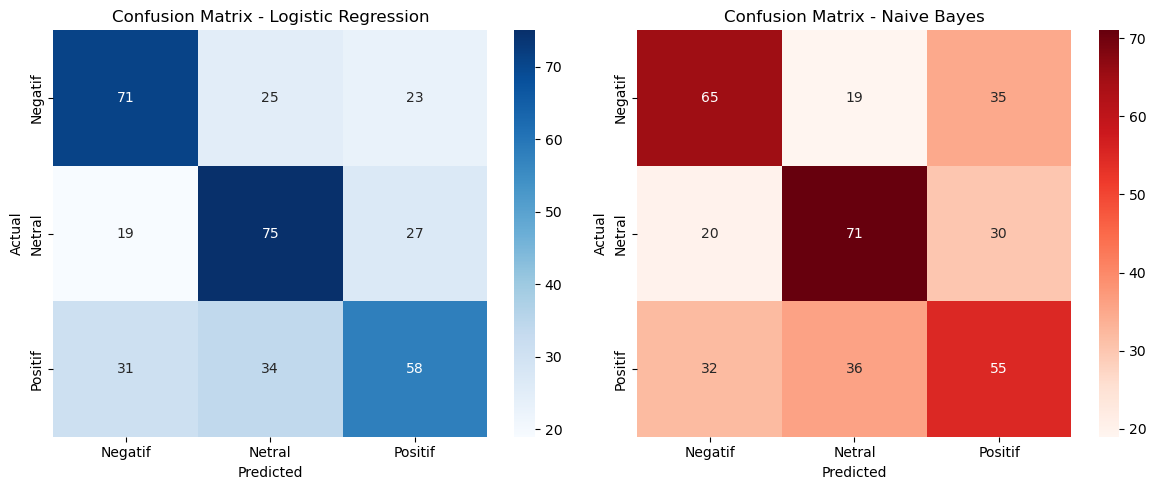

In [17]:
# Plot confusion matrix untuk Naive Bayes
plt.figure(figsize=(12, 5))

# Plot confusion matrix untuk Logistic Regression
plt.subplot(1, 2, 1)
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(gr_conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()